## Problem 1

We consider a real-valued random variable $X:(\Omega,\mathscr{F})\to (\mathbb{R},\mathcal{B}(\mathbb{R}))$ such that the law $P_X:\mathcal{B}(\mathbb{R})\to[0,1]$ has the distribution function $F_X(x)=P_X((-\infty,x])$ in a piecewise form defined by

$$F_X(x)=\bigg(x-\frac{3}{4}\bigg)\mathbf{1}_{[1,3/2)}(x)+\mathbf{1}_{[3/2,\infty)}(x)$$

It is possible to find its generalized inverse $F_X^{-1}(u)=\inf\{x:F_X(x)\geq u\}$ over the unit interval which is given by

$$F_X^{-1}(u)=\mathbf{1}_{[0,1/4]}(u)+\bigg(u+\frac{3}{4}\bigg)\mathbf{1}_{(1/4,3/4]}(u)+\frac{3}{2}\mathbf{1}_{(3/4,1]}(u)$$

This is because $X$ has point masses at $x=\{1,3/2\}$ and is such that $P(X=1)=P(X=3/2)=1/4$ and is therefore a mixed continuous and discrete random variable. In particular, the law of $X$ is uniform in $[1,3/2)$. Using generalized functions, the density of $X$ is then given by

$$f_X(x)=\frac{1}{4}\delta(x-1)+\mathbf{1}_{(1,3/2)}(x)+\frac{1}{4}\delta(x-3/2)$$

where $\delta$ is the Dirac delta, or point mass. It must be noticed that $f_X$ is not a proper Lebesgue density (i.e. it is not a valid Radon-Nikodym derivative $dP_X/d\lambda$). However we can check that for $x \in [1,3/2)$:

$$P(X\leq x)=\frac{1}{4}+\int_{1}^xdx=\frac{1}{4}+(x-1)=x-\frac{3}{4}$$

and in general we can check that the distribution function (which is cadlag) has two jump discontinuities

$$\lim_{x \to \frac{3}{2}^-}P(X\leq x)=\frac{3}{4}\neq 1= F_X\bigg(\frac{3}{2}\bigg) \qquad \lim_{x \to 1^-}P(X\leq x)=0\neq F_X(1)=\frac{1}{4}$$

This implies that a sample histogram will have a form similar to the generalized density above (i.e. a bimodality with two peaks at the extrema and a uniform distribution in the middle). We can sample from $P_X$ using an IID sequence $(U_n)_{n\leq N}$ for some sample length $N \in \mathbb{N}$ and the fact that $F_X^{-1}(U)\sim X$ if $U \sim \textrm{Uniform}[0,1]$, obtaining an IID sample $(X_1,X_2,...,X_N)$. We can partition the interval $[1,3/2]$ in the following way:

$$\mathcal{P}_m=\{x_0,x_1,x_2,...,x_{m-1},x_{m}\}=\bigg\{1,1+\Delta x_m,1+2\Delta x_m,...,1+(m-1)\Delta x_m,\frac{3}{2}\bigg\}$$

where $\Delta x_m = (3/2-1)/m=1/(2m)$. A histogram $I^X_m$ for this specific random variable could then be defined by

$$I^X_{m,j}(x_j)=\sum_{n\leq N}\mathbf{1}_{(x_{j-1},x_j]}(X_n),\,j=2,...,m, \qquad I^X_{m,1}(x_1)=\sum_{n\leq N}\mathbf{1}_{[x_{0},x_1]}(X_n)$$

However, especially at very fine grid spacing, a more informative visualization of the data can be given by the empirical distribution function $\hat{F}$ which is defined by

$$\hat{F}(x_j)=\frac{1}{N}\sum_{n\leq N}\mathbf{1}_{(-\infty,x_j]}(X_n)$$

This is because the histogram bars on the classes $[1,1+\Delta x_m]$ and $(3/2-\Delta x_m,3/2]$ tend to become relatively too thin and tall if compared to the intermediate classes in the interval, making the histogram less effective from a data visualization perspective. Furthermore, there is no formal density with which to compare the histogram to. On the other hand, $\hat{F}$ shows convergence towards $F_X$. Here I present a histogram $I^X_m$ for large spacing and a empirical cdf $\hat{F}$ with a very fine grid spacing. 


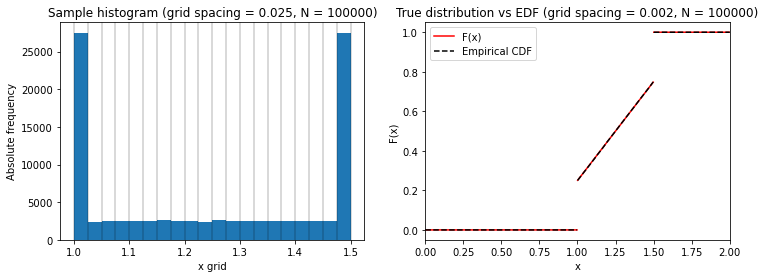

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as mp

numpy.random.seed(787236)

def x_distribution(x):
    
    # This function returns the cdf of the random 
    # variable X given an array of values on the 
    # real line.
    
    first_layer = numpy.where(numpy.logical_and(1<=x,x<3/2),x-3/4,1)
    second_layer = numpy.where(numpy.logical_and(first_layer==1,x>=3/2),1,first_layer)
    third_layer = numpy.where(numpy.logical_and(second_layer==1,x<1),0,first_layer)
    return third_layer

def generalized_inverse(u):
    
    # This function returns the generalized inverse 
    # of the cdf of X given an array of variables in 
    # the unit interval.
    
    first_layer = numpy.where(numpy.logical_and(1/4<=u,u<3/4),u+3/4,1)
    second_layer = numpy.where(numpy.logical_and(first_layer==1,u<1/4),1,first_layer)
    third_layer = numpy.where(numpy.logical_and(second_layer==1,u>3/4),3/2,first_layer)
    return third_layer

def histogram(histogram_grid,Dxm,x_sample):
    
    # This function returns the histogram as defined, 
    # given a specified grid, a grid spacing and the 
    # sample for which to compute the histogram.
    
    def barcount(xj,histogram_grid,Dxm,x):
    
        if xj == histogram_grid[1]:
            histogram = numpy.sum(numpy.where(numpy.logical_and(xj-Dxm<=x,x<=xj),1,0))
        else:
            histogram = numpy.sum(numpy.where(numpy.logical_and(xj-Dxm+1e-13<x,x<=xj),1,0))
            
        return histogram
    
    sample_histogram = numpy.zeros((histogram_grid_m))
    for x_k in range(1,histogram_grid_m+1):
        sample_histogram[x_k-1] = barcount(histogram_grid[x_k],histogram_grid,Dxm,x_sample)
  
    return sample_histogram

def empirical_distribution_function(x_sample,x_linspace):
    
    # This function returns the empirical distribution 
    # function of a sample given a grid over which to 
    # compute the empirical distribution function.
    
    sample_length = len(x_sample)
    length_x_linspace = len(x_linspace)
    
    empirical_distribution_function = numpy.zeros(length_x_linspace)
    for x_k in range(0,length_x_linspace):
        empirical_distribution_function[x_k] = (numpy.sum(numpy.where(
                                    x_sample<=x_linspace[x_k],1,0))/sample_length)
    
    return empirical_distribution_function

# Generate sample with generalized inverse

sample_length = int(1e+05)
sample_uniform = scipy.stats.uniform.rvs(size=sample_length)

x_sample = generalized_inverse(sample_uniform)

# Histogram

histogram_grid_m = 20
Dxm = 1/(2*histogram_grid_m)
histogram_grid = 1+numpy.arange(0,histogram_grid_m+1,1)*Dxm

sample_histogram = histogram(histogram_grid,Dxm,x_sample)

# Empirical distribution

length_x_linspace = int(1e+03)
x_min = 0
x_max = 2
x_linspace = numpy.linspace(x_min,x_max,length_x_linspace,endpoint=True)

edf_x_sample = empirical_distribution_function(x_sample,x_linspace)

# Plots 

f_, axarr = mp.subplots(1, 2, sharex=False,figsize=(12,4))
ax1,  ax2 = axarr.flatten()

for x_k in range(0,histogram_grid_m+1):
    ax1.axvline(x=histogram_grid[x_k],color='black',alpha=0.2)

ax1.fill_between(histogram_grid,numpy.append(0,sample_histogram),step='pre')
ax1.set_ylim(ymin=0)
ax1.set_title('Sample histogram (grid spacing = {}, N = {})'.format(Dxm,sample_length))
ax1.set_ylabel('Absolute frequency')
ax1.set_xlabel('x grid')

ax2.plot(x_linspace,numpy.where(numpy.diff(x_distribution(x_linspace),append=0)>0.1,
                                numpy.nan,x_distribution(x_linspace)),'r',label='F(x)')
ax2.plot(x_linspace,numpy.where((numpy.diff(edf_x_sample,append=0))>0.1,
                                numpy.nan,edf_x_sample),'k--',label='Empirical CDF')
ax2.set_xlim((x_min,x_max))
ax2.set_title('True distribution vs EDF (grid spacing = {}, N = {})'.format(round(numpy.diff(x_linspace)[0],3),sample_length))
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.legend()

mp.show()



As an antithetic pair, we can use  $(F_X^{-1}(U),F_X^{-1}(1-U))$ where $U$ is a standard uniform random variable. We can see that $1-U\sim \textrm{Uniform}[0,1]$ so that $F^{-1}_X(U)\sim F^{-1}_X(1-U)\sim X$. We can estimate numerically the covariance using a Monte Carlo approach; in this case this yields a quantity strictly less than $0$. We can use the estimator

$$\hat{\textrm{Cov}}_{X,Y}^N=\frac{1}{N-1}\sum_{k\leq N}(X_k-\overline{X}_N)(Y_k-\overline{Y}_N)\stackrel{\textrm{a.s.}}{\to}\textrm{Cov}[X,Y]$$

where convergence is due to the strong LLN. $\overline{X}_N,\overline{Y}_N$ are respectively the sample means of $(X_k)_{k\leq N},(Y_k)_{k\leq N}$ where the pairs $(X_k,Y_k)$ are IID.


In [2]:

def sample_covariance(x,y):
    
    avg_x = numpy.average(x)
    avg_y = numpy.average(y)
    
    return numpy.matmul(x-avg_x,y-avg_y)/(len(x)-1)

x_sample_flipped_uniform = generalized_inverse(1-sample_uniform)

print()
print('Estimated covariance of antithetic pair (2): ',
      sample_covariance(x_sample,x_sample_flipped_uniform))
print()



Estimated covariance of antithetic pair (2):  -0.04159978679621142




## Problem 2 (1)

We have that $Z=(Z_1,Z_2,...,Z_{10})\sim \mathcal{N}_{10}(0,I_{10})$. We then define the vector $\hat{X}=(\hat{X}_1,\hat{X}_2,...,\hat{X}_{10})$ where $\hat{X}_k=\sqrt{hk}Z_k,\,h>0$ and $k\in\{1,2,...,10\}$. First, we prove that if two random variables $Z,W:(\Omega,\mathscr{F})\to (\mathbb{R},\mathcal{B}(\mathbb{R}))$ are independent and $f,g:\mathbb{R}\to \mathbb{R}$ are Borel functions, then $f(Z),g(W)$ are independent: let $B,C \in \mathcal{B}(\mathbb{R})$

$$\begin{aligned}P(f(Z)\in B,g(W) \in C)&=P(Z^{-1}(f^{-1}(B))\cap W^{-1}(g^{-1}(C)))=\\
&=P(Z \in f^{-1}(B))P(W \in g^{-1}(C)))=\\
&=P(f(Z) \in B)P(g(W) \in C)
\end{aligned}$$

and this extends to arbitrary finite collections of independent random variables. We can then see that for $x=(x_1,x_2,...,x_{10})\in \mathbb{R}^{10}$ we have the joint distribution

$$\begin{aligned}P(\hat{X}_1\leq x_1,\hat{X}_2\leq x_2,...,\hat{X}_{10}\leq x_{10})&=P(\sqrt{h}Z_1\leq x_1,\sqrt{2h}Z_2\leq x_2,...,\sqrt{10h}Z_{10}\leq x_{10})=\\
&=\prod_{k\leq 10}P(\sqrt{kh}Z_k\leq x_k)=\\
&=\prod_{k\leq 10}P(\hat{X}_k\leq x_k)
\end{aligned}$$ 

because $y \mapsto \sqrt{hk}y$ is continuous, and thus Borel $\forall k$. Since $x$ is arbitrary, the components in the vector are independent. Furthermore, the components are all marginally Gaussian, i.e. $\hat{X}_k\sim \mathcal{N}_1(0,hk)$. Therefore the distribution of the vector $\hat{X}$ is

$$\hat{X}=\begin{bmatrix}
\hat{X}_1\\
\hat{X}_2\\
\hat{X}_3\\
...\\
\hat{X}_{10}\\
\end{bmatrix}\sim \mathcal{N}_{10}(0,\hat{\Sigma}
) \quad \textrm{where} \quad \hat{\Sigma}=\begin{bmatrix}
h & 0 & 0 & ... & 0\\
0 & 2h & 0 & ... & 0\\
0 & 0 & 3h & ... & 0\\
... & ... & ... & ... & ...\\
0 & 0 & 0 & ... & 10h\\
\end{bmatrix}$$

Let us recall the properties of a Brownian motion $(B_t)_{t \geq 0}$ on a filtered probability space $(\Omega,\mathscr{F},\mathscr{F}_t,P)$:

$$\begin{aligned}
&(1). \quad B_0=0 \quad P\textrm{-a.s.}\\
&(2). \quad B_t-B_s \sim \mathcal{N}(0,t-s),\,\forall s<t\\
&(3). \quad B_{t_2}-B_{t_1},...,B_{t_k}-B_{t_{k-1}} \textrm{ are independent for any choice of }0\leq t_1<t_2<...<t_{k-1}<t_k\\
&(4). \quad t\mapsto B(t,\omega) \textrm{ is (stochastically) continuous.}
\end{aligned}$$

We can then see that $\hat{X}$ is not a valid simulation of a Brownian path: in fact, we can in particular see that the increment vector $(\hat{X}_1,\hat{X}_2-\hat{X}_1,\hat{X}_3-\hat{X}_2,...,\hat{X}_d-\hat{X}_{d-1})$ for arbitrary $d\in \mathbb{N}$ is made of dependent components, therefore property $(3)$ is not satisfied. Indeed:

$$\textrm{Cov}[\hat{X}_k-\hat{X}_{k-1},\hat{X}_{k-1}-\hat{X}_{k-2}]=E[(\hat{X}_k-\hat{X}_{k-1})(\hat{X}_{k-1}-\hat{X}_{k-2})]=-E[\hat{X}_{k-1}^2]=-h(k-1)$$

We can compare the paths drawn by $\hat{X}$ and a proper simulation of Brownian motion, computed as follows on the same grid:

$$\Delta W = \Big(\sqrt{h}Z_1,\sqrt{h}Z_2,\sqrt{h}Z_3,...,\sqrt{h}Z_{d}\Big),\,Z_k\sim \mathcal{N}_1(0,1)\textrm{ IID}\implies W_{jh}=\sum_{k\leq j}\Delta W_k,\,j \in \{1,2,...,d\}$$

The difference becomes very notable at high $d$.


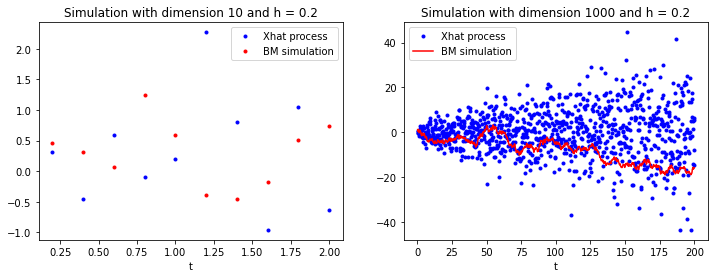

In [3]:

numpy.random.seed(787236)

def Xhat_simulation(h,dimension):
    
    # This function simulates an instance of 
    # the Xhat process as defined above by using 
    # a multivariate normal rv and an identity 
    # covariance matrix.
    
    time_grid = numpy.arange(1,dimension+1)*h
    Z_multivariate_normal = scipy.stats.multivariate_normal.rvs(cov=numpy.eye(dimension))
    Xhat_simulation = Z_multivariate_normal*numpy.sqrt(time_grid)
    
    return time_grid, Xhat_simulation

# Plot

h = 0.2
low_dimension = 10
high_dimension = 1000

brownian_increments_lowd = scipy.stats.norm.rvs(size=low_dimension,scale=numpy.sqrt(h))
brownian_increments_highd = scipy.stats.norm.rvs(size=high_dimension,scale=numpy.sqrt(h))

time_grid_low_dimension, Xhat_simulation_lowdimension = Xhat_simulation(h,low_dimension)
time_grid_high_dimension, Xhat_simulation_highdimension = Xhat_simulation(h,high_dimension)

f_, axarr = mp.subplots(1, 2, sharex=False,figsize=(12,4))
ax1,  ax2 = axarr.flatten()

ax1.plot(time_grid_low_dimension,Xhat_simulation_lowdimension,'b.',label='Xhat process')
ax1.plot(time_grid_low_dimension,numpy.cumsum(brownian_increments_lowd),'r.',label='BM simulation')
ax1.set_title('Simulation with dimension {} and h = {}'.format(low_dimension,h))
ax1.set_xlabel('t')
ax1.legend()

ax2.plot(time_grid_high_dimension,Xhat_simulation_highdimension,'b.',label='Xhat process')
ax2.plot(time_grid_high_dimension,numpy.cumsum(brownian_increments_highd),'r-',label='BM simulation')
ax2.set_title('Simulation with dimension {} and h = {}'.format(high_dimension,h))
ax2.set_xlabel('t')
ax2.legend()

mp.show()



## Problem 2 (2)

We now consider the class of Ito processes on $I=[0,T]$ or $I=[0,\infty)$ such that
 
$$dX_t=\mu(X_t)dt+\sigma(X_t)dW_t,\,\sigma,\mu \in C^{k}(\mathbb{R}),\,k\geq 2,\,(W_t)_{t \in I} \sim \textrm{BM}_1(I)$$

We associate a differential operator $\mathcal{L}f$ acting on $C^{k}(\mathbb{R}),\,k\geq 2$ defined by

$$(\mathcal{L} f)(x)=\mu(x)f'(x)+\frac{1}{2}\sigma(x)^2f''(x)$$

It can be shown that a second order numerical solution scheme for $X_t$ can be expressed as

$$X_{t+h} \approx X_t + E_t + M_t + S_t$$

where $E_t,M_t,S_t$ are respectively the Euler scheme term, the additional Milstein scheme term, and the additional second order Euler scheme term. In detail:

$$\begin{aligned}E_t &= \mu(X_t)h + \sigma(X_t)(W_{t+h}-W_t)\\
M_t&=\sigma(X_t)\sigma'(X_t)\int_{t}^{t+h} \int_t^sdW_udW_s\\
S_t&= (\mathcal{L}\mu)(X_t)\int_{t}^{t+h} \int_t^sduds+\sigma(X_t)\mu'(X_t)\int_{t}^{t+h} \int_t^sdW_uds+(\mathcal{L}\sigma)(X_t)\int_{t}^{t+h} \int_t^sdudW_s\\
\end{aligned}$$

We are looking for a specification of $\mu,\sigma$ s.t. $M_t \neq 0$ and $S_t=0$. We now check that $\mu(x)=0,\,\sigma(x)=\gamma x$ for any $\gamma \in \mathbb{R}/\{0\}$ satisfies the requirement nontrivially. We have

$$\begin{aligned}&(\mathcal{L}\sigma)(x)=0\cdot \gamma+\frac{\gamma^2}{2}x^2 \cdot 0=0\\
&(\mathcal{L}\mu)(x)=0\cdot 0+\frac{\gamma^2}{2}x^2 \cdot 0=0
\\
&\sigma(x)\mu'(x)=\gamma x \cdot 0 = 0\end{aligned}$$

and therefore $S_t=0$. Furthermore:

$$\sigma(x)\sigma'(x)=\gamma^2x\cdot 1 = \gamma^2x$$

so that $M_t \neq 0$. It follows that for $dX_t =\gamma X_tdW_t$ the second order Euler scheme coincides with the Milstein scheme, but the Milstein scheme does not coincide with the Euler scheme, as desired. The solution is

$$X_t=X_0e^{-\frac{\gamma^2t}{2}+\gamma W_t}$$

Such class of processes corresponds to the standard exponential martingales for Brownian motion.



## Problem 3

The one-dimensional Black-Scholes asset market $(S_t,B_t)_{t \in [0,T]}$ under the risk neutral measure $\mathbb{Q}$ is determined by the pair of differential equations

$$\begin{aligned}
dS_t &= r S_t dt + \sigma S_t dW_t\\
dB_t &= r B_t dt
\end{aligned}$$

where $S_t$ is the risky asset with $S_0=s_0>0$, $B_t$ is the money market account with $B_0=1$, $r$ is the constant risk free interest rate and $\sigma$ the constant volatility of the risky asset. By using Ito on the log-asset $\ln(S_t)$ and solving $B_t$, we obtain the solution of the system:

$$S_t=S_0e^{(r-\sigma^2/2)t+\sigma W_t},\quad B_t = e^{rt}$$

Let $\mathscr{F}_t^S=\sigma(S_u,u\leq t)$. The fair price today $(t=0)$ of a contingent claim (i.e. a derivative contract) on $S_t$ is expressed by $P_0=e^{-rT}E^\mathbb{Q}[F]$ where $F\in L^1(\Omega,\mathscr{F}^S_T,\mathbb{Q})$ denotes the stochastic payoff of the claim at maturity $T$. In this case we have

$$F(\omega)=\bigg(K-\frac{1}{m}\sum_{1\leq k\leq m}S_{t_k}(\omega)\bigg)^+$$

that is, a path dependent payoff with strike price $K$. The monitoring times are $t_k=kh$ where $h=T/m$ for some $m \in \mathbb{N}$. We can estimate $P_0$ using a Monte Carlo simulation with number of simulations $N\in \mathbb{N}$ large. Since we can simulate $S_t$ exactly on the time grid $(t_k)_{1\leq k \leq m}$, we will simulate the monitored prices recursively by using the exact scheme

$$S_{j,t_k}=S_{t_{j,k-1}}e^{(r-\sigma^2/2)h+\sigma \sqrt{h}Z_{j,k}},\,k \in \{1,2,...,m\},\,j \in \{1,2,...,N\}$$

and $Z_{j,k}\sim \mathcal{N}(0,1)$ IID. We then obtain $N$ simulated discounted payoffs:

$$e^{-rT}F_j=e^{-rT}\bigg(K-\frac{1}{m}\sum_{1\leq k\leq m}S_{j,t_k}\bigg)^+,\,j \in \{1,2,...,N\}$$

and the Monte Carlo estimator $I_N$ will be given by

$$P_0\approx I_N = \frac{1}{N}\sum_{j\leq N}e^{-rT}F_j$$

Since $(F_j)_{j\leq N}$ are IID and $F \in L^1(\Omega,\mathscr{F}^S_T,\mathbb{Q})$, we can use, by central limit theorem, an approximated Gaussian confidence interval for $I_N$, which becomes more apt as $N \uparrow \infty$. In detail, for a confidence level $\alpha>0.5$ (in this case $\alpha=0.99$):

$$CI_N(\alpha)=\bigg[I_N-z_{1-\frac{1-\alpha}{2}}\frac{\hat{\sigma}_N}{\sqrt{N}},I_N+z_{1-\frac{1-\alpha}{2}}\frac{\hat{\sigma}_N}{\sqrt{N}}\bigg] \quad \textrm{where} \quad \hat{\sigma}_N^2=\frac{1}{N-1}\sum_{j\leq N}(e^{-rT}F_j-I_N)^2,\,\,z_\beta=\Phi^{-1}(\beta)$$

Since $I_N \to P_0$ almost surely, we have that $\mathbb{Q}(|I_N-P_0|>\varepsilon)\to 0$ for arbitrary $\varepsilon >0$, i.e. we have convergence in probability. In the following, I show the dynamics of the Monte Carlo estimate and the corresponding confidence interval as $N$ grows larger for the suggested values of the parameters. As $N$ grows, $CI_N(\alpha)$ becomes smaller and the distribution more concentrated around $P_0$.



Estimated Monte Carlo option price N=10000:  6.65383009715976
Lower extremum of confidence interval:  6.425429605528143
Upper extremum of confidence interval:  6.882230588791378



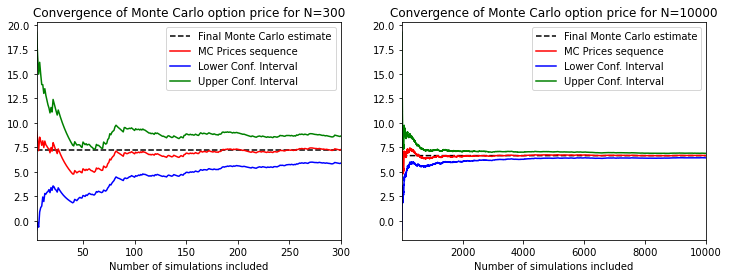

In [4]:

numpy.random.seed(787234)

def gbm_montecarlo(N_gbm_simulations,T,m,S0,sigma,r):
    
    # This (vectorized) function returns the grid 
    # space over which the GBM is simulated, and the 
    # simulation itself. The simulation is then a matrix 
    # with as many columns as there are simulations, and
    # as many rows as the monitoring times + time t=0.
    
    h = T/m
    t_space = numpy.arange(0,m+1,1)*h
       
    gbm_simulations = numpy.zeros((len(t_space),N_gbm_simulations))
    gbm_simulations[0,:] = S0
    for t_k in range(1,len(t_space)):
         gbm_simulations[t_k,:] = gbm_simulations[t_k-1,:]*numpy.exp((r-sigma**2/2)*h
                 +sigma*numpy.sqrt(h)*scipy.stats.norm.rvs(size=N_gbm_simulations))
        
    return t_space, gbm_simulations

def P0_montecarlo_option_average(gbm_matrix,r,T,K,alfa):
    
    # Computes the arithmetic average option using a 
    # standard Monte Carlo method, together with the 
    # estimator variance and the extrema of the
    # Gaussian confidence interval for a given 
    # alfa (confidence level).
    
    averages = numpy.average(gbm_matrix[1:,:],axis=0)
    payoffs = numpy.maximum(K-averages,0)*numpy.exp(-r*T)
    
    z_value = scipy.stats.norm.ppf(1-(1-alfa)/2)
    
    MCprice = numpy.average(payoffs)
    variance_MC_price = numpy.var(payoffs,ddof=1)/len(payoffs)
    inf_confidence_interval = (MCprice-
            z_value*numpy.sqrt(variance_MC_price))
    sup_confidence_interval = (MCprice+
            z_value*numpy.sqrt(variance_MC_price))
    
    return MCprice, variance_MC_price, inf_confidence_interval, sup_confidence_interval

def convergence_analysis_option_average(gbm_matrix,r,T,K,alfa,jstart):
    
    # Computes an array of Monte Carlo estimates of 
    # the arithmetic average option by sequentially 
    # including an increasing number of simulations. 
    # The result is useful to evaluate the convergence 
    # of the scheme (see the plots for an example). The 
    # sequential inclusion starts from a number of 
    # simulations equal to 'jstart'.
    
    MCprices, variances_MC_price, inf_confidence_intervals, sup_confidence_intervals = (
        numpy.zeros(numpy.shape(gbm_matrix)[1]-jstart) for i in range(0,4))
   
    for k in range(jstart,numpy.shape(gbm_matrix)[1]):
        
        MCprice, variance_MC_price, inf_confidence_interval, sup_confidence_interval =(
            P0_montecarlo_option_average(gbm_matrix[:,:k],r,T,K,alfa))
        
        MCprices[k-jstart] = MCprice
        variances_MC_price[k-jstart] = variance_MC_price
        inf_confidence_intervals[k-jstart] = inf_confidence_interval
        sup_confidence_intervals[k-jstart] = sup_confidence_interval
        
    return MCprices, variances_MC_price, inf_confidence_intervals, sup_confidence_intervals

T = 1
m = 100
K = 100
S0 = 100
sigma = 0.3
r = 0.01

N_simulations = int(1e+04)

alfa = 0.99
jstart = 5

simulations_axis = numpy.arange(jstart,N_simulations,1)

t_space, gbm_matrix = gbm_montecarlo(N_simulations,T,m,S0,sigma,r)

# Estimated 

MCprice, variance_MC_price, inf_confidence_interval, sup_confidence_interval = (
    P0_montecarlo_option_average(gbm_matrix,r,T,K,alfa))

print()
print('Estimated Monte Carlo option price N={}: '.format(N_simulations),MCprice)
print('Lower extremum of confidence interval: ',inf_confidence_interval)
print('Upper extremum of confidence interval: ',sup_confidence_interval)
print()

# Plot of convergence

MCprices, variance_MC_price, inf_confidence_intervals, sup_confidence_intervals = (
    convergence_analysis_option_average(gbm_matrix,r,T,K,alfa,jstart))

f_, axarr = mp.subplots(1, 2, sharex=False,figsize=(12,4))
ax1,  ax2 = axarr.flatten()

ax1.plot(simulations_axis,numpy.full(shape=len(simulations_axis),
        fill_value=MCprices[300]),'k--',label='Final Monte Carlo estimate')
ax1.plot(simulations_axis,MCprices,'r',label='MC Prices sequence')
ax1.plot(simulations_axis,inf_confidence_intervals,'b',label='Lower Conf. Interval')
ax1.plot(simulations_axis,sup_confidence_intervals,'g',label='Upper Conf. Interval')
mp.xlim((jstart,N_simulations-1))
ax1.legend()
ax1.set_title('Convergence of Monte Carlo option price for N={}'.format(300))
ax1.set_xlabel('Number of simulations included')
ax1.set_xlim((jstart,300))

ax2.plot(simulations_axis,numpy.full(shape=len(simulations_axis),
        fill_value=MCprices[-1]),'k--',label='Final Monte Carlo estimate')
ax2.plot(simulations_axis,MCprices,'r',label='MC Prices sequence')
ax2.plot(simulations_axis,inf_confidence_intervals,'b',label='Lower Conf. Interval')
ax2.plot(simulations_axis,sup_confidence_intervals,'g',label='Upper Conf. Interval')
ax2.legend()
ax2.set_title('Convergence of Monte Carlo option price for N={}'.format(N_simulations))
ax2.set_xlabel('Number of simulations included')
ax2.set_xlim((jstart,N_simulations))

mp.show()



Now let us consider the 'geometric average' discounted payoff

$$e^{-rT}G(\omega)=e^{-rT}\bigg(K-\bigg(\prod_{1\leq k\leq m}S_{t_k}(\omega)\bigg)^\frac{1}{m}\bigg)^+$$

and let us assume that $e^{-rT}E^Q[G]$ is known. We could then use $G$ as a control variate for the estimation of $P_0$. We then define

$$P_0 \approx I_N^{\textrm{CV}}=\frac{1}{N}\sum_{j\leq N}e^{-rT}(F_j-\hat{b}(G_j-E^\mathbb{Q}[G])) \quad \textrm{where} \quad G_j=\bigg(K-\bigg(\prod_{1\leq k\leq m}S_{j,t_k}\bigg)^\frac{1}{m}\bigg)^+$$

and $\hat{b}=\hat{\textrm{Cov}}_{F,G}^N/\hat{\sigma}^2_{G,N}$. In general, we can assert that $G$ is a good control variate if the correlation coefficient $\rho_{F,G}$ is high. This can be estimated as following:

$$\hat{\rho}_{F,G}^N:=\frac{\hat{\textrm{Cov}}_{F,G}^N}{\hat{\sigma}_{G,N}\hat{\sigma}_{F,N}}=\hat{b}\frac{\hat{\sigma}_{G,N}}{\hat{\sigma}_{F,N}}$$

where $\hat{\sigma}_{G,N},\hat{\sigma}_{F,N}$ are respectively the sample standard deviations of the discounted $G_j$ payoffs and of the discounted $F_j$ payoffs. In the following code, I compute the estimate numerically for large $N$. The result shows that the correlation is very high, thus showing a very low estimated variance ratio $1-(\hat{\rho}_{F,G}^N)^2$, which implies that the variance of the control variate estimator is much lower than the variance of the ordinary Monte Carlo estimator for $e^{-rT}E^\mathbb{Q}[F]$. Therefore, the control variate estimator is preferable in this case to the ordinary Monte Carlo estimator. However, in general it could be difficult to find a control variate with known expectation, especially in the case of exotic options with complex payoffs. A variance reduction scheme with the antitethic variates method could be considered: in such case, we would only need to specify a joint distribution of $(F_j,F_j^{\textrm{AV}})$ such that the covariance is negative; this could for example be implemented using copula models.


In [5]:

def beta_controlvariate_geomavg(gbm_matrix,K,r):
    
    # This function estimates the beta coefficient 
    # for the control variate estimator and the 
    # corresponding correlation coefficient. The beta 
    # is estimated using sample covariance and sample 
    # variance, as in a linear regression.
    
    def sample_covariance(x,y):
    
        avg_x = numpy.average(x)
        avg_y = numpy.average(y)

        return numpy.matmul(x-avg_x,y-avg_y)/(len(x)-1)
    
    averages = numpy.average(gbm_matrix[1:,:],axis=0)
    payoffs_avg = numpy.maximum(K-averages,0)*numpy.exp(-r*T)
    
    geometric_averages = numpy.prod(gbm_matrix[1:,:],axis=0)**(1/(numpy.shape(gbm_matrix)[0]-1))
    payoffs_geomavg = numpy.maximum(K-geometric_averages,0)*numpy.exp(-r*T)
    
    sample_cov = sample_covariance(payoffs_geomavg,payoffs_avg)
    
    geometric_average_variance = numpy.var(payoffs_geomavg,ddof=1)
    arithm_average_variance = numpy.var(payoffs_avg,ddof=1)
    
    beta = sample_cov/geometric_average_variance
    rho = beta*numpy.sqrt(geometric_average_variance/arithm_average_variance)
    
    return beta, rho

beta_cvs, rho_cvs = beta_controlvariate_geomavg(gbm_matrix,K,r)

print()
print('Beta control variate: ',beta_cvs)
print('Correlation control variate: ',rho_cvs)
print('Variance ratio: ',1-rho_cvs**2)
print()



Beta control variate:  0.9608591263481538
Correlation control variate:  0.9992623809279254
Variance ratio:  0.0014746940622536453




## Problem 4

We have the initial value problem (IVP) on $t \in [0,2]$ determined by

$$\begin{aligned}
u'(t)&=u(t) + 5t - 10\\
u(0)&=8
\end{aligned}$$

To check that $u(t)=3e^t-5t+5$ is a solution, we compute its first time derivative and its initial value:

$$\begin{aligned}u'(t)&=3e^t-5=(3e^t-5t+5)+5t-10=u(t)+ 5t - 10\\
u(0)&=3+5=8
\end{aligned}$$

and then we can assert that $u(t)$ is a solution to the IVP. We can define the forward FDM scheme on the grid $t_\ell=\ell \Delta t$, $\Delta t = 2/n$ for $\ell = \{0,1,...,n\},\,n \in \mathbb{N}$ in the following way:

$$\begin{aligned}u_{t_{\ell+1}}&=u_{t_{\ell}}+\Delta t(u_{t_{\ell}}+ 5t_\ell - 10)\\
u_0&=8
\end{aligned}$$

My implementation is presented in the following code snippet, together with a plot of the convergence behavior for larger $n$ towards the exact analytical solution. It is clear that the forward scheme underestimates the analytical solution, and the error increases as time increases. For values near $0$, the forward scheme provides good approximate results, while for values further from $0$ the error is sizeable even at small grid spacings. This could be due to the propagation of the error of the numerical scheme over the time index. The grid points are highlighted on the line plots.


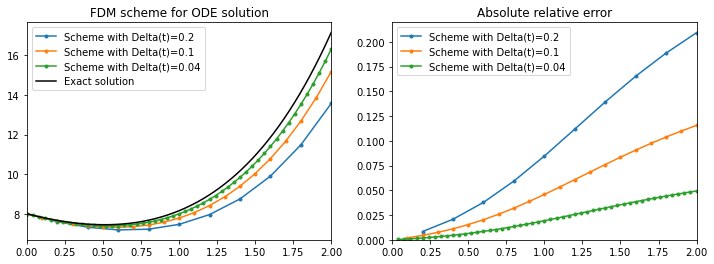

In [6]:

def FDM_scheme_ode(T,n_grid_length,u0):
    
    # The function returns the time grid, the time
    # grid spacing and the finite difference scheme
    # for the specified differential equation.
    
    Dt = T/n_grid_length
    t_mesh = numpy.arange(0,n_grid_length+1,1)*Dt

    mesh_length = len(t_mesh)
    fdm_array = numpy.zeros(mesh_length)
    fdm_array[0] = u0
    for n_k in range(1,mesh_length):
        fdm_array[n_k] = fdm_array[n_k-1] + Dt*(fdm_array[n_k-1]+5*t_mesh[n_k-1]-10)
        
    return t_mesh, Dt, fdm_array

def u(t):
    return 3*numpy.exp(t)-5*t+5

T = 2
u0 = 8

# plot

Nlength_tcontinuous = 1000
tcontinuous = numpy.linspace(0,T,Nlength_tcontinuous)

n_grid_lengths = numpy.array([10,20,50])

f_, axarr = mp.subplots(1, 2, sharex=False,figsize=(12,4))
ax1,  ax2 = axarr.flatten()

for grid_length in n_grid_lengths:

    t_mesh, Dt, u_fdm = FDM_scheme_ode(T,grid_length,u0)
    relative_error = numpy.absolute((u(t_mesh[1:])-u_fdm[1:])/u(t_mesh[1:]))
    
    ax1.plot(t_mesh,u_fdm,'.-',label='Scheme with Delta(t)={}'.format(Dt))
    ax2.plot(t_mesh,numpy.append(numpy.nan,relative_error),'.-',label='Scheme with Delta(t)={}'.format(Dt))
    
ax1.plot(tcontinuous,u(tcontinuous),'k',label='Exact solution')
ax1.set_xlim((0,T))
ax1.set_title('FDM scheme for ODE solution')
ax1.legend()

ax2.set_xlim((0,T))
ax2.set_title('Absolute relative error')
ax2.set_ylim(ymin=0)
ax2.legend()

mp.show()



Let us assume we want to compute $u(t^*)$ for some $t^*\in [0,2]$ using the forward scheme. Define the absolute error between the analytical solution value and the forward scheme as $a_n(t^*):=|u(t^*)-\hat{u}_n(t^*)|$ where $\hat{u}_n(t^*)$ is the value taken by the forward scheme at the specified time. An approximator algorithm could be designed as following: 

$(1)$. Set the terminal time of the forward scheme described above as $t^*$. In this way we will take the last value of the scheme as our estimate.

$(2)$. Iterate the forward scheme for decreasing time spacing (i.e. $n \uparrow \infty$ with step $n_{\textrm{step}}$ specified).

$(3).$ Stop if $a_n(t^*_n)\leq \varepsilon$ for some pre-defined $\varepsilon >0$ or a pre-defined tolerance limit $N\in \mathbb{N}$ is reached by $n$.

For $t^*=1.77$, we choose $\varepsilon = 0.001$ and $n_{\textrm{step}}=100$ and $N=\textrm{1e+9}$. It is to be noticed that the tolerance level is not reached, but the optimal grid length is very high. This is due to the fact that $t^*$ is close to $2$ and therefore the error in the forward scheme is relatively high. Indeed, if we compare the result for a lower $t^*$ (e.g. $t^*=0.2$) the optimal grid length for a good approximation (i.e. $\leq \varepsilon$) is much lower.


In [7]:

def approximator(whicht, varepsilon, tolerance, grid_step, starting_n_grid_length_t):
    
    # This function is the approximator algorithm 
    # which is described above. The tolerance signal is 
    # a binary variable that indicates if the tolerance
    # level has been reached (1) or not (0). It returns 
    # the reached grid length, the approximated value of 
    # the function at the chosen time, the true value the 
    # function at the chosen time, and the tolerance signal.
    
    tolerance_signal = 0
    ngrid = starting_n_grid_length_t
    
    while True:
        
        fdm_approximation_ut = (FDM_scheme_ode(whicht,ngrid,u0)[-1])[-1]
        trueut = u(whicht)
        
        if numpy.absolute(fdm_approximation_ut-trueut) <= varepsilon:   
            break
        
        elif ngrid < tolerance:
            ngrid += grid_step
            
        else:
            tolerance_signal = 1
            break
        
    return ngrid, fdm_approximation_ut, trueut, tolerance_signal

whicht = 1.77
varepsilon = 0.001
tolerance = int(1e+09)
grid_step = 100
starting_n_grid_length_t = 10

optimal_ngrid, fdm_approximation_ut, trueut, tolerance_signal = approximator(whicht, 
                varepsilon, tolerance, grid_step, starting_n_grid_length_t)

print()
print('For t*=',whicht)
print('Optimal grid length for step size {} and initial grid size {}: '.format(
    grid_step,starting_n_grid_length_t),optimal_ngrid)
print('Approximated value: ',fdm_approximation_ut)
print('True value: ',trueut)
print('Absolute error: ',numpy.absolute(fdm_approximation_ut-trueut))
print('Tolerance signal: ',tolerance_signal)


whicht2 = 0.2

optimal_ngrid2, fdm_approximation_ut2, trueut2, tolerance_signal2 = approximator(whicht2, 
                varepsilon, tolerance, grid_step, starting_n_grid_length_t)

print()
print('For t*=',whicht2)
print('Optimal grid length for step size {} and initial grid size {}: '.format(
    grid_step,starting_n_grid_length_t),optimal_ngrid2)
print('Approximated value: ',fdm_approximation_ut2)
print('True value: ',trueut2)
print('Absolute error: ',numpy.absolute(fdm_approximation_ut2-trueut2))
print('Tolerance signal: ',tolerance_signal2)

print()


For t*= 1.77
Optimal grid length for step size 100 and initial grid size 10:  27610
Approximated value:  13.761560908735342
True value:  13.762560084147806
Absolute error:  0.0009991754124634156
Tolerance signal:  0

For t*= 0.2
Optimal grid length for step size 100 and initial grid size 10:  110
Approximated value:  7.663542921648899
True value:  7.66420827448051
Absolute error:  0.0006653528316107327
Tolerance signal:  0

